In [18]:
import pyrebase

In [206]:
import config
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import time
import numpy as np

%matplotlib inline

In [20]:
config.url

'surveybox-fe69c'

In [21]:
firebase

In [67]:
config = {
  "apiKey": "apiKey",
  "authDomain": "projectId.firebaseapp.com",
  "databaseURL": "https://surveybox-fe69c.firebaseio.com",
  "storageBucket": "projectId.appspot.com"}

firebase = pyrebase.initialize_app(config)

In [68]:
db = firebase.database()

In [91]:
# use push to generate an auto-id


db.child("events").push(data={"timestamp": str(datetime.datetime.now().strftime('%s')), 'type': 'transit', 'unit': '98798yuah8'})

{'name': '-Lxr12ilORWmTRzxPeNY'}

In [290]:
# use push to generate an auto-id
for _ in range(10):
    t = np.random.choice(['walk', 'transit', 'wheels', 'car'])
    db.child("events").push(data={"timestamp": str(datetime.datetime.now().strftime('%s')), 
                              'type': t, 'unit': '98798yuah8'})
    s = np.random.choice([4, 2, 3, 1])
    time.sleep(s)
    print(t)

transit
car
car
wheels
wheels
car
car
car
car
transit


In [92]:
str(datetime.datetime.now().strftime('%s'))

'1578250041'

In [251]:
d = db.order_by_child('events')

In [265]:
# db.child().get().val()

In [282]:
resp = db.get()

In [283]:
data = []
for f, v in dict(resp.val())['events'].items():
    data.append(v)
data = pd.DataFrame(data)

In [284]:
def convert(d):
    try:
        return datetime.datetime.fromtimestamp(int(d))
    except:
        'error'

In [285]:
data['timestamp'] = data['timestamp'].apply(convert)

In [271]:
# data

In [272]:
data = data.sort_values('timestamp')

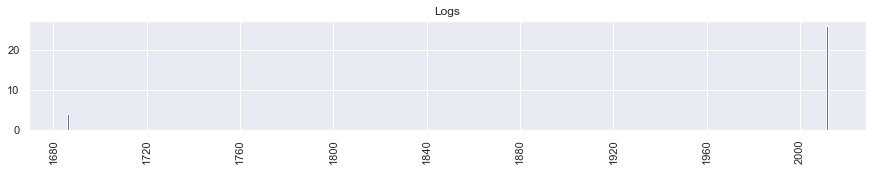

In [273]:
plt.figure(figsize=(15, 2))
plt.hist(data['timestamp'], rwidth=.05, bins=20)
plt.title('Logs')
_=plt.xticks(rotation=90)

In [274]:
# data.sort_values('timestamp')

In [278]:
unit_translation = {'38ed9c286f24': "Cafe Allegro", 
                    '98798yuah8': "Bulldog Espresso", 
                    "a03e9e286f24": "Magus Books"}

In [286]:
data['count'] = 1
grouped_data = data.groupby(['unit', 'type'])['count'].sum().reset_index()

list_ordering = ["walk", "wheels", 'transit', 'car']  

grouped_data["type"] = pd.Categorical(grouped_data["type"], categories=list_ordering, ordered=True)
grouped_data["unit"] = grouped_data['unit'].apply(lambda k: unit_translation[k])

In [328]:
sns.set_style("whitegrid")
# Create an array with the colors you want to use
colors = ['#66b3ff','#99ff99','#ff9999','#808080']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

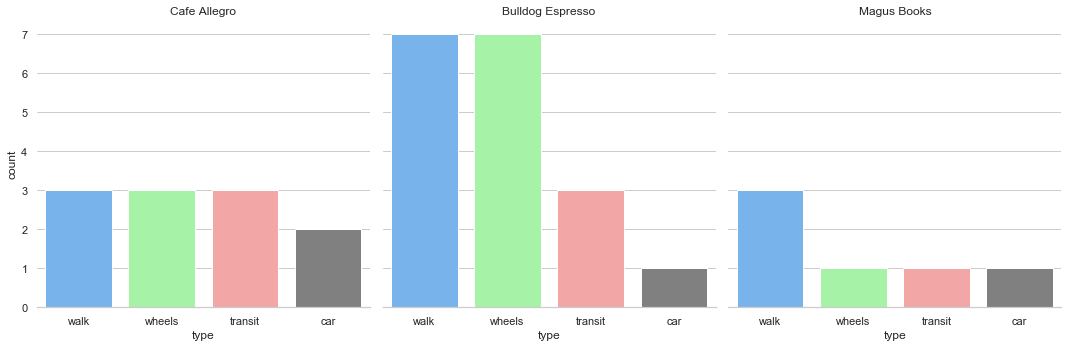

In [329]:
g = sns.catplot(x="type", y="count", col="unit",
                data=grouped_data,
                kind="bar", aspect=1, palette=customPalette)
(g.set_xticklabels(["walk", "wheels", "transit", "car"])
    .set_titles("{col_name}")
    .despine(left=True))
sns.set(font_scale=1)

In [293]:
grouped_data

,unit,type,count
0,Cafe Allegro,car,2
1,Cafe Allegro,transit,3
2,Cafe Allegro,walk,3
3,Cafe Allegro,wheels,3
4,Bulldog Espresso,car,1
5,Bulldog Espresso,transit,3
6,Bulldog Espresso,walk,7
7,Bulldog Espresso,wheels,7
8,Magus Books,car,1
9,Magus Books,transit,1


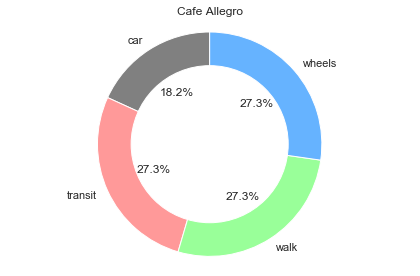

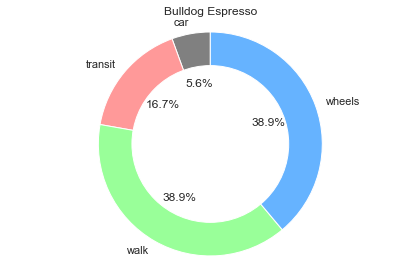

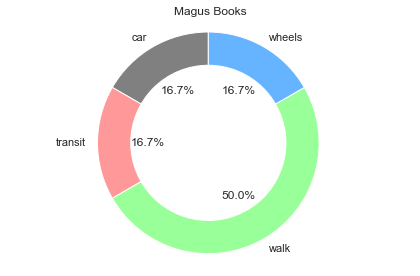

In [317]:
# Pie chart

for u in grouped_data['unit'].unique():
    mini = grouped_data[grouped_data['unit'] == u]
    labels = mini['type']
    sizes = mini['count']
    
    #colors
    colors = ['#808080','#ff9999','#99ff99','#66b3ff']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=.55)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(u)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.savefig(f'{u}_circle.png')
    plt.show()